<a href="https://colab.research.google.com/github/neeel-patel/CNN-for-MNIST/blob/main/CNN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from keras.datasets import mnist
from keras import callbacks 

Loading data and pre-processing

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


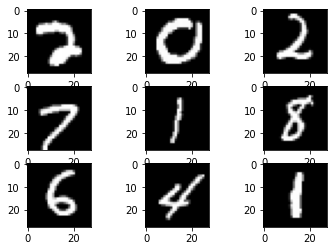

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[120+i], cmap=plt.get_cmap('gray'))
plt.show()

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Utilities

a simple model generator

using available activation layers:
https://keras.io/api/layers/activation_layers/


In [ ]:
def gen(
    input = input_shape,
    output = num_classes,
    conv = (8, 16, 32), # conv layers with feature map numbers
    kernel = 3, # kernel size
    activation = keras.layers.ReLU,
    maxpool = 2, #  maxpool size
    c_p = True, # pool after each conv2d
    dense = (),
    dropout = 0.4
):
  model = keras.Sequential()
  model.add(keras.Input(shape=input))

  # now add conv2d layers
  for layer in conv:
    model.add(layers.Conv2D(layer, kernel_size=kernel, padding='same'))
    model.add(activation())

    # maxpool after each conv2d layer
    if c_p:
      model.add(layers.MaxPool2D(pool_size=maxpool))
  
  if not c_p:
    model.add(layers.MaxPool2D(pool_size=maxpool))
  
  model.add(layers.Flatten())

  # add dense layers
  for layer in dense:
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(layer))
    model.add(activation())

  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(output, activation='softmax'))

  return model

function for plotting results

In [ ]:
def plot_results(histories, hyperparameter = []):
    plt.figure(figsize=(10,10))
    # plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for history in histories:
        plt.plot(history.history['val_accuracy'])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(hyperparameter)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for history in histories:
        plt.plot(history.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(hyperparameter)
    plt.show()

function for training models

In [ ]:
def train(models, batch_size = 64, epochs = 30):
    histories = [model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, validation_data=(x_test,y_test)) for model in models]
    return histories

#Optimizers


Lets try to experiment and see accuracy for different optimizers

Adamax
Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.6914 - accuracy: 0.7931 - val_loss: 0.1929 - val_accuracy: 0.9447
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2395 - accuracy: 0.9271 - val_loss: 0.1236 - val_accuracy: 0.9657
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1780 - accuracy: 0.9464 - val_loss: 0.1011 - val_accuracy: 0.9723
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1388 - accuracy: 0.9572 - val_loss: 0.0877 - val_accuracy: 0.9754
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1184 - accuracy: 0.9654 - val_loss: 0.0763 - val_accuracy: 0.9779
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1072 - accuracy: 0.9673 - val_loss: 0.0705 - val_accuracy: 0.9793
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0993 - accuracy: 0.9681 - val_loss: 0.0640 - val_accuracy: 0.9808

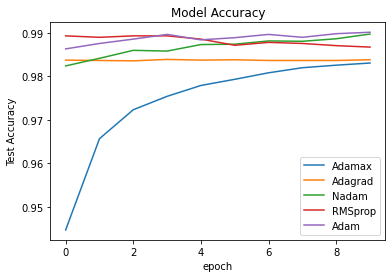

In [ ]:
model = [gen(conv=(16,), dense=(256,))] * 7
%matplotlib inline
import matplotlib.pyplot as plt
optimizers = [
    'Adamax',
    'Adagrad',
    'Nadam',
    'RMSprop',
    'Adam'
]
i = 0
for optimizer in optimizers:
    print(optimizer)
    model[i].compile(loss="categorical_crossentropy", optimizer=optimizer , metrics=["accuracy"])
    history = model[i].fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2, validation_data=(x_test,y_test))
    val_loss, val_accuracy = model[i].evaluate(x_test, y_test, verbose=False)
    plt.plot(history.history['val_accuracy'])
    i = i + 1
    
plt.title('Model Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('epoch')
plt.legend(['Adamax', 'Adagrad', 'Nadam','RMSprop', 'Adam'], loc='lower right' )

# Experiment with single conv2d layer

single conv2d layer

In [ ]:
# how many filters
filters = [8,16,32]

models = [gen(conv=(n,)) for n in filters]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

Epoch 1/30
750/750 [==============================] - 4s 4ms/step - loss: 0.8344 - accuracy: 0.7691 - val_loss: 0.2135 - val_accuracy: 0.9418
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2538 - accuracy: 0.9244 - val_loss: 0.1511 - val_accuracy: 0.9588
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1954 - accuracy: 0.9402 - val_loss: 0.1285 - val_accuracy: 0.9656
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1696 - accuracy: 0.9490 - val_loss: 0.1121 - val_accuracy: 0.9703
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1558 - accuracy: 0.9535 - val_loss: 0.1027 - val_accuracy: 0.9724
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1412 - accuracy: 0.9564 - val_loss: 0.0950 - val_accuracy: 0.9740
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1309 - accuracy: 0.9601 - val_loss: 0.0881 - val_accuracy: 0.9750
Epoch 

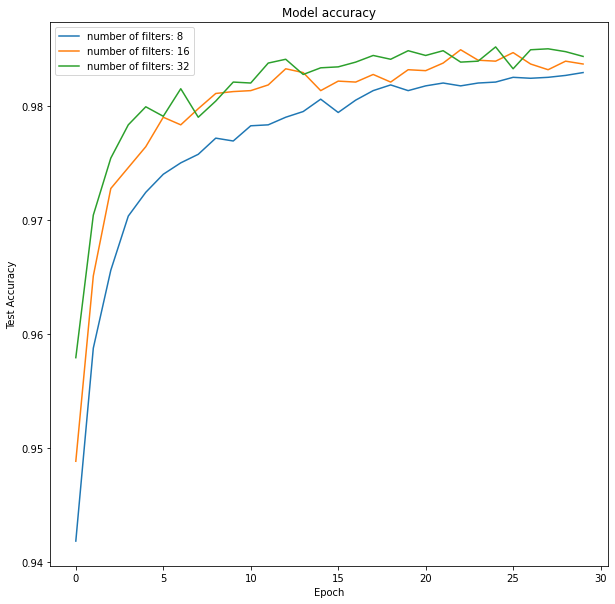

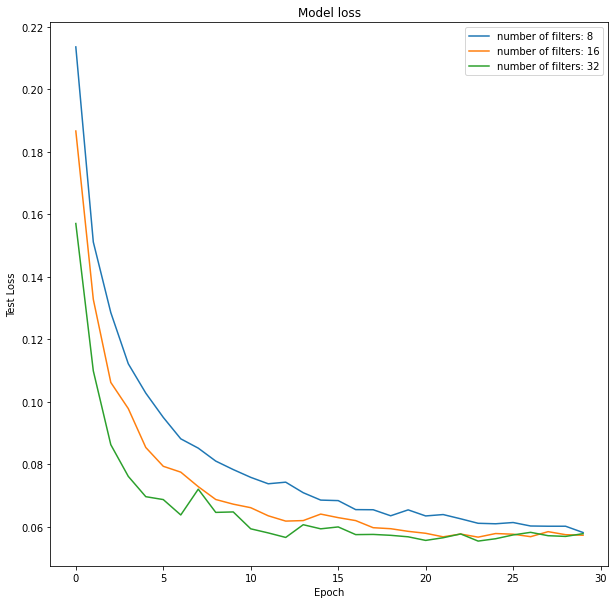

In [ ]:
plot_results(histories, hyperparameter=['number of filters: '+ str(i) for i in filters])

# Experiment with different number of conv2d layers

how many conv layers

In [ ]:
conv2dlayers = [(8,16),(8,16,32),(8,16,32,64)]

models = [gen(conv=n) for n in conv2dlayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 0.8586 - accuracy: 0.7280 - val_loss: 0.1361 - val_accuracy: 0.9617
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1892 - accuracy: 0.9410 - val_loss: 0.0985 - val_accuracy: 0.9715
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1376 - accuracy: 0.9566 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1206 - accuracy: 0.9616 - val_loss: 0.0716 - val_accuracy: 0.9795
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1046 - accuracy: 0.9683 - val_loss: 0.0696 - val_accuracy: 0.9790
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0989 - accuracy: 0.9685 - val_loss: 0.0612 - val_accuracy: 0.9830
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0907 - accuracy: 0.9713 - val_loss: 0.0579 - val_accuracy: 0.9832
Epoch 

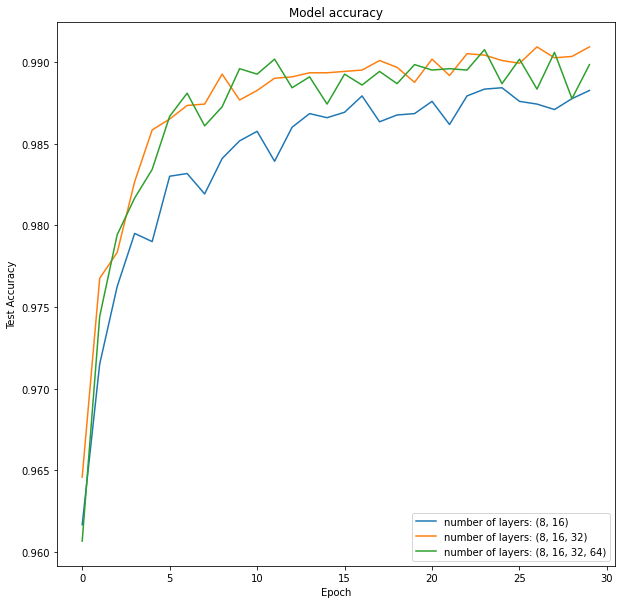

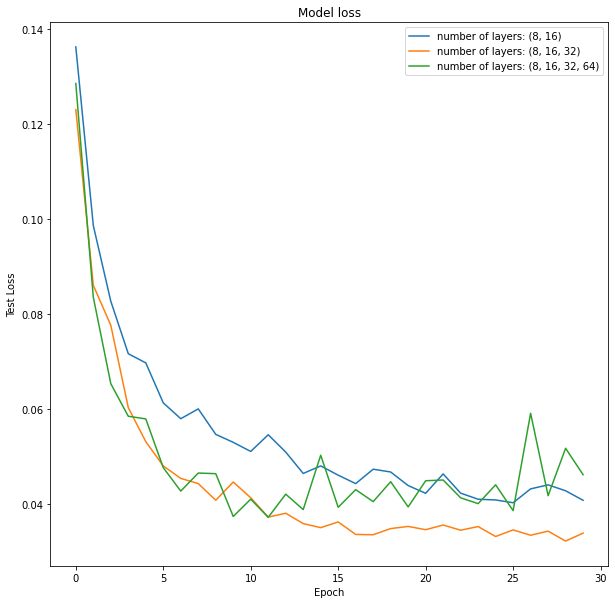

In [ ]:
plot_results(histories, hyperparameter=['number of layers: '+ str(i) for i in conv2dlayers])

# Experiment with different number of filters

it looks like 3 layers work the best

how about increase the number of filters in each layer

In [ ]:
conv2dlayers = [(8,16,32),(16,32,64),(32,64,128),(64,128,256)]

models = [gen(conv=n) for n in conv2dlayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.9841 - accuracy: 0.6768 - val_loss: 0.1078 - val_accuracy: 0.9676
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.1705 - accuracy: 0.9479 - val_loss: 0.0755 - val_accuracy: 0.9769
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1185 - accuracy: 0.9641 - val_loss: 0.0600 - val_accuracy: 0.9833
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0989 - accuracy: 0.9710 - val_loss: 0.0574 - val_accuracy: 0.9836
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0859 - accuracy: 0.9736 - val_loss: 0.0488 - val_accuracy: 0.9859
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0748 - accuracy: 0.9760 - val_loss: 0.0408 - val_accuracy: 0.9886
Epoch 

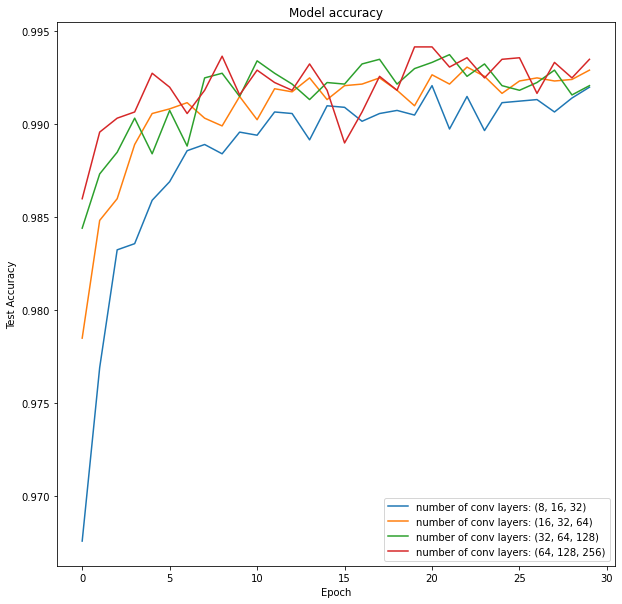

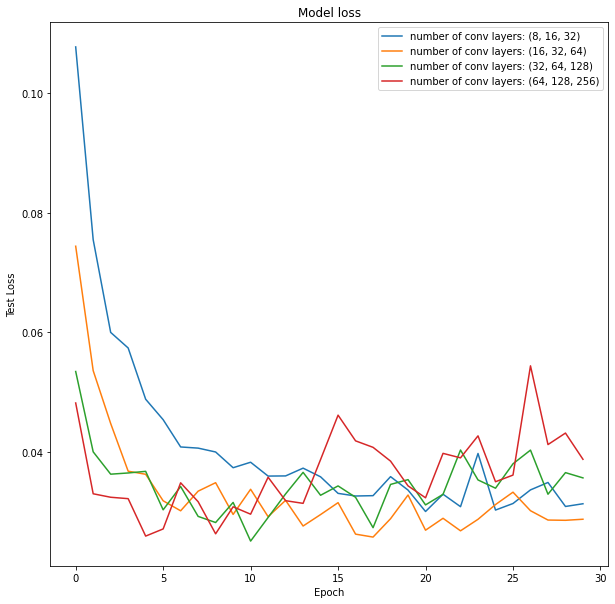

In [ ]:
plot_results(histories, hyperparameter=['number of conv layers: '+ str(i) for i in conv2dlayers])

# Experiment with different number of dense layers

fix (32,64,128)
change dense layers

In [ ]:
denselayers = [(32,),(32,32),(32,32,32)]

models = [gen(conv=(32,64,128),dense=n) for n in denselayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

Epoch 1/30
750/750 [==============================] - 8s 9ms/step - loss: 0.8772 - accuracy: 0.7063 - val_loss: 0.0699 - val_accuracy: 0.9793
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.1768 - accuracy: 0.9482 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.1218 - accuracy: 0.9653 - val_loss: 0.0408 - val_accuracy: 0.9891
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0936 - accuracy: 0.9721 - val_loss: 0.0519 - val_accuracy: 0.9843
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0914 - accuracy: 0.9729 - val_loss: 0.0362 - val_accuracy: 0.9900
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0833 - accuracy: 0.9757 - val_loss: 0.0319 - val_accuracy: 0.9912
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0690 - accuracy: 0.9803 - val_loss: 0.0347 - val_accuracy: 0.9912
Epoch 

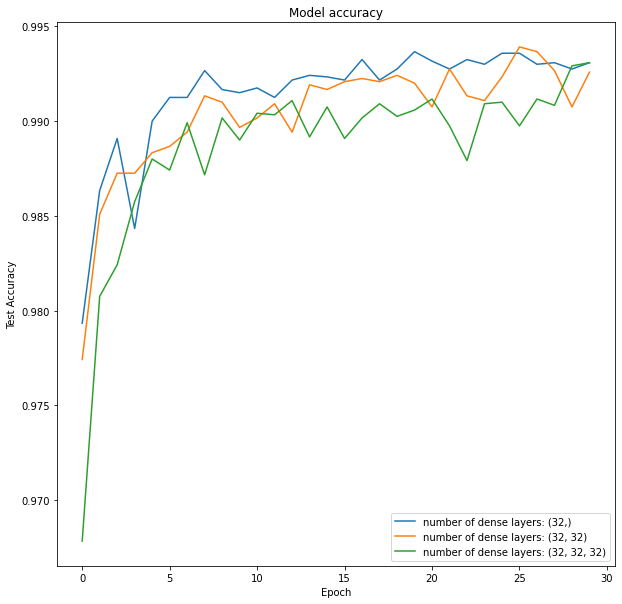

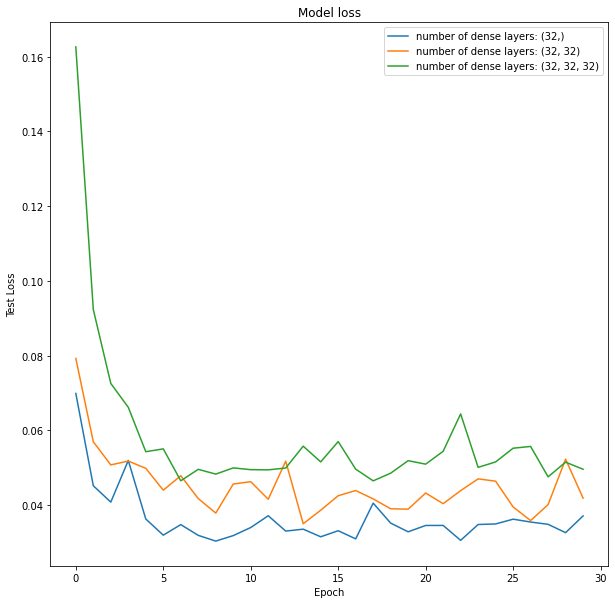

In [ ]:
plot_results(histories, hyperparameter=['number of dense layers: '+ str(i) for i in denselayers])

# Experiment with units of dense layer

As we can see that, more dense layers does not improve the performace

So, let's try to change the size of denselayer

In [ ]:
denselayers = [(32,),(64,),(128,),(256,)]

models = [gen(conv=(32,64,128),dense=n) for n in denselayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

Epoch 1/30
750/750 [==============================] - 9s 12ms/step - loss: 0.8259 - accuracy: 0.7193 - val_loss: 0.0645 - val_accuracy: 0.9816
Epoch 2/30
750/750 [==============================] - 9s 11ms/step - loss: 0.1736 - accuracy: 0.9471 - val_loss: 0.0512 - val_accuracy: 0.9848
Epoch 3/30
750/750 [==============================] - 8s 11ms/step - loss: 0.1316 - accuracy: 0.9615 - val_loss: 0.0443 - val_accuracy: 0.9864
Epoch 4/30
750/750 [==============================] - 8s 11ms/step - loss: 0.1073 - accuracy: 0.9680 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0897 - accuracy: 0.9725 - val_loss: 0.0352 - val_accuracy: 0.9908
Epoch 6/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0771 - accuracy: 0.9772 - val_loss: 0.0326 - val_accuracy: 0.9914
Epoch 7/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 0.0303 - val_accuracy: 0.9921

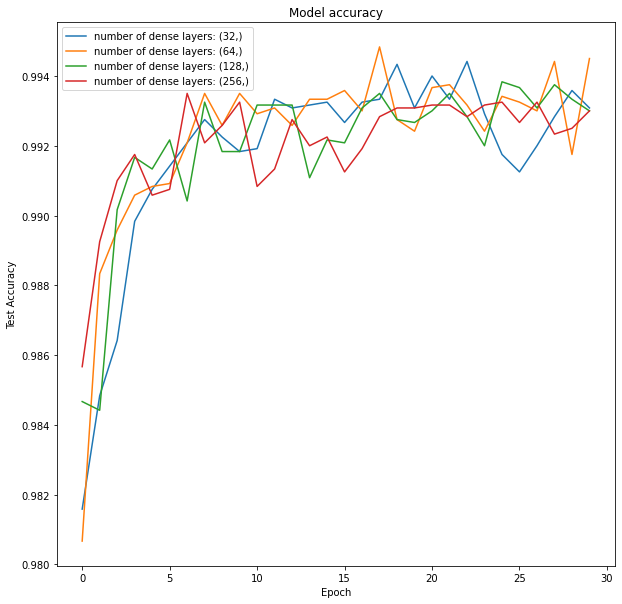

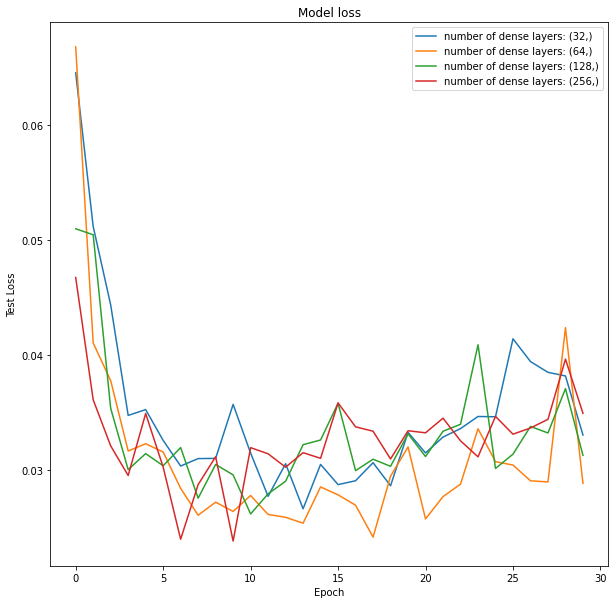

In [ ]:
plot_results(histories, hyperparameter=['number of dense layers: '+ str(i) for i in denselayers])

# Activation functions

Moving on with dense layer size 256

experiment the effect of different activation functions

In [ ]:
activations = ['ReLU','leakyReLU','ELU']
act_functions = [keras.layers.ReLU,
                 keras.layers.LeakyReLU,
                 keras.layers.ELU]

models = [gen(conv=(32,64,128),dense=(256,10),activation=n) for n in act_functions]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
histories = train(models)

Epoch 1/30
750/750 [==============================] - 9s 12ms/step - loss: 1.2909 - accuracy: 0.5075 - val_loss: 0.0932 - val_accuracy: 0.9793
Epoch 2/30
750/750 [==============================] - 8s 11ms/step - loss: 0.5190 - accuracy: 0.7899 - val_loss: 0.0684 - val_accuracy: 0.9843
Epoch 3/30
750/750 [==============================] - 9s 11ms/step - loss: 0.4528 - accuracy: 0.8142 - val_loss: 0.0591 - val_accuracy: 0.9873
Epoch 4/30
750/750 [==============================] - 9s 11ms/step - loss: 0.4240 - accuracy: 0.8272 - val_loss: 0.0629 - val_accuracy: 0.9883
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.4051 - accuracy: 0.8387 - val_loss: 0.0540 - val_accuracy: 0.9895
Epoch 6/30
750/750 [==============================] - 9s 11ms/step - loss: 0.3974 - accuracy: 0.8477 - val_loss: 0.0568 - val_accuracy: 0.9878
Epoch 7/30
750/750 [==============================] - 9s 11ms/step - loss: 0.3669 - accuracy: 0.8557 - val_loss: 0.0493 - val_accuracy: 0.9903

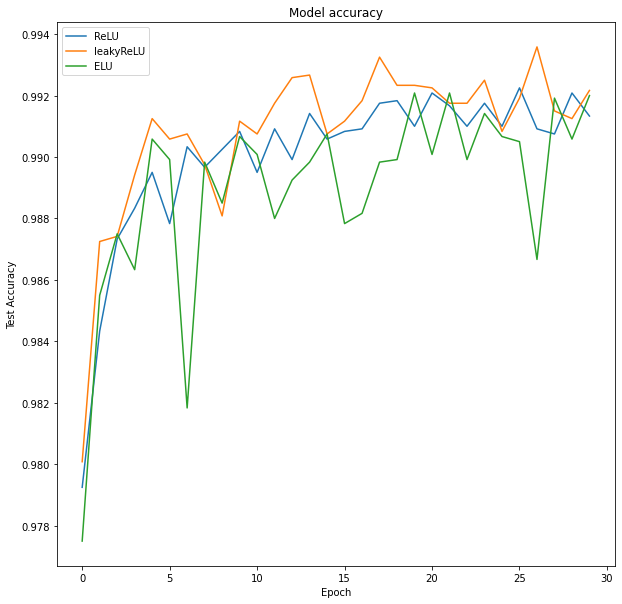

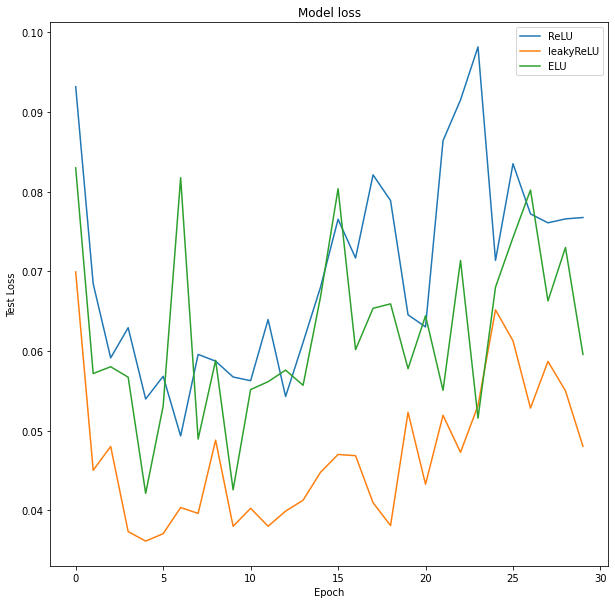

In [ ]:
plot_results(histories, hyperparameter=activations)

# Now putting everything together

In [ ]:
model = gen(conv=(32,64,128),dense=(256,))
model.summary()
model.save('final_model.h5')

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
re_lu_62 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
re_lu_63 (ReLU)              (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 7, 7, 128)       

In [ ]:
epochs = 20
batch_size = 32
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 3, restore_best_weights = True) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 25, validation_data=(x_test,y_test), callbacks =[earlystopping]) 


Epoch 1/25
469/469 [==============================] - 7s 13ms/step - loss: 0.5884 - accuracy: 0.8051 - val_loss: 0.0405 - val_accuracy: 0.9866
Epoch 2/25
469/469 [==============================] - 5s 12ms/step - loss: 0.0774 - accuracy: 0.9759 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 3/25
469/469 [==============================] - 5s 12ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0246 - val_accuracy: 0.9923
Epoch 4/25
469/469 [==============================] - 6s 12ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0262 - val_accuracy: 0.9908
Epoch 5/25
469/469 [==============================] - 5s 12ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0222 - val_accuracy: 0.9930
Epoch 6/25
469/469 [==============================] - 5s 12ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0194 - val_accuracy: 0.9934
Epoch 7/25
469/469 [==============================] - 5s 12ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0190 - val_accuracy: 0.9937

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.015950653702020645
Test accuracy: 0.9944999814033508
